# TensorFlow to code linear regression

In [1]:
from __future__ import print_function
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Hyper Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data，
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.079361387 W= 0.222635 b= 0.995408
Epoch: 0100 cost= 0.079090036 W= 0.224238 b= 0.983873
Epoch: 0150 cost= 0.078849845 W= 0.225746 b= 0.973023
Epoch: 0200 cost= 0.078637250 W= 0.227165 b= 0.962819
Epoch: 0250 cost= 0.078449108 W= 0.228499 b= 0.953223
Epoch: 0300 cost= 0.078282580 W= 0.229753 b= 0.944198
Epoch: 0350 cost= 0.078135170 W= 0.230933 b= 0.93571
Epoch: 0400 cost= 0.078004658 W= 0.232043 b= 0.927727
Epoch: 0450 cost= 0.077889115 W= 0.233086 b= 0.920219
Epoch: 0500 cost= 0.077786826 W= 0.234068 b= 0.913156
Epoch: 0550 cost= 0.077696256 W= 0.234991 b= 0.906514
Epoch: 0600 cost= 0.077616051 W= 0.23586 b= 0.900267
Epoch: 0650 cost= 0.077545032 W= 0.236676 b= 0.894391
Epoch: 0700 cost= 0.077482149 W= 0.237445 b= 0.888865
Epoch: 0750 cost= 0.077426448 W= 0.238167 b= 0.883667
Epoch: 0800 cost= 0.077377133 W= 0.238847 b= 0.878778
Epoch: 0850 cost= 0.077333443 W= 0.239486 b= 0.87418
Epoch: 0900 cost= 0.077294745 W= 0.240087 b= 0.869855
Epoch: 0950 cost= 0.077260442 W

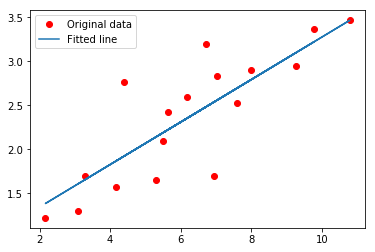

In [5]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c),"W=", sess.run(W), "b=", sess.run(b))
                  
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()